<a href="https://colab.research.google.com/github/SergeiVKalinin/Research-Projects/blob/main/Batteries/PyBammDKL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Pybamm

In [ ]:
!pip install pybamm

In [ ]:
import pybamm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.integrate as integrate

# Set Up Physics Model and Parameters

In [ ]:
##Pick parameter set
parameter_values = pybamm.ParameterValues("OKane2022")

In [ ]:
dfn_model = pybamm.lithium_ion.DFN({"SEI":"ec reaction limited",
                             "SEI film resistance":"average",
                            "lithium plating":"irreversible",
                            "thermal":"lumped"
                            })

spm_model = pybamm.lithium_ion.SPM({"SEI":"ec reaction limited",
                             "SEI film resistance":"average",
                            "lithium plating":"irreversible",
                            "thermal":"lumped"
                            })

In [ ]:
parameter_values.update({
                         "SEI kinetic rate constant [m.s-1]":9e-16,
                        "Lithium plating kinetic rate constant [m.s-1]":1e-9,
                        "Ambient temperature [K]":298
                        })

Here we set a range for each voltage and current segment of the charge algorithm.

In [ ]:
V1_range = np.linspace(2.9,3.3,20)
C1_range = np.linspace(1.5,2.5,20)
V2_range = np.linspace(3.3,3.7,20)
C2_range = np.linspace(1,2,20)
V3_range = np.linspace(3.7,4.1,20)
C3_range = np.linspace(1,2,20)
C4_range = np.linspace(0.5,1.5,20)

Generate 50 combinations of current and voltage segments so that voltage profiles can be generated.

In [ ]:
param_combos = []
for i in range(50):
  V1_sample = np.random.choice(V1_range)
  C1_sample = np.random.choice(C1_range)
  V2_sample = np.random.choice(V2_range)
  C2_sample = np.random.choice(C2_range)
  V3_sample = np.random.choice(V3_range)
  C3_sample = np.random.choice(C3_range)
  C4_sample = np.random.choice(C4_range)
  param_combos.append([V1_sample,C1_sample,V2_sample,C2_sample,V3_sample,C3_sample,C4_sample])

In [ ]:
df_param_combos = pd.DataFrame(param_combos,
                              columns=['V1', 'C1', 'V2',
                                       'C2', 'V3', 'C3',
                                       'C4'])
df_param_combos

,V1,C1,V2,C2,V3,C3,C4
0,2.984211,1.921053,3.405263,1.421053,3.889474,1.631579,0.868421
1,2.942105,2.131579,3.700000,1.368421,3.742105,1.526316,1.026316
2,3.131579,2.289474,3.636842,1.052632,4.078947,1.157895,0.973684
3,3.257895,2.342105,3.489474,1.947368,3.889474,1.578947,1.236842
4,3.068421,2.236842,3.363158,1.947368,3.700000,1.368421,0.552632
5,3.068421,2.289474,3.636842,1.947368,3.994737,1.263158,0.552632
6,3.089474,2.289474,3.300000,1.578947,3.910526,1.000000,0.657895
7,3.236842,2.078947,3.552632,1.421053,3.952632,1.315789,0.973684
8,2.942105,2.184211,3.363158,1.631579,3.973684,1.684211,0.763158
9,3.110526,1.815789,3.657895,1.368421,3.973684,1.000000,0.605263


# Generate V(t) Trajectories

In [ ]:
times = []
voltages = []
for parameters in param_combos:
    V1 = parameters[0]
    C1 = parameters[1]
    V2 = parameters[2]
    C2 = parameters[3]
    V3 = parameters[4]
    C3 = parameters[5]
    C4 = parameters[6]

    # define charging algorthim
    experiment_2 = pybamm.Experiment([
    (f"Charge at {C1}C until {V1}V",
     f"Rest for 10 seconds",
     f"Charge at {C2}C until {V2}V",
     f"Rest for 10 seconds",
     f"Charge at {C3}C until {V3}V",
     f"Rest for 10 seconds",
     f"Charge at {C4}C until 4.2 V",
     f"Hold at 4.2 V until 0.1C",
     f"Rest for 10 minutes"
    )] * 1)


    var_pts = {
    "x_n": 10,  # negative electrode
    "x_s": 10,  # separator
    "x_p": 10,  # positive electrode
    "r_n": 10,  # negative particle
    "r_p": 10,  # positive particle
    }

    solver = pybamm.CasadiSolver(mode="safe")

    sim = pybamm.Simulation(spm_model,parameter_values=parameter_values,experiment=experiment_2,var_pts=var_pts)

    print("evaluating function for p = ", parameters)
    simulation = sim.solve(initial_soc = 0)

    time = simulation['Time [s]'].entries
    voltage = simulation['Terminal voltage [V]'].entries

    times.append(time)
    voltages.append(voltage)




Text(0, 0.5, 'Terminal voltage [V]')

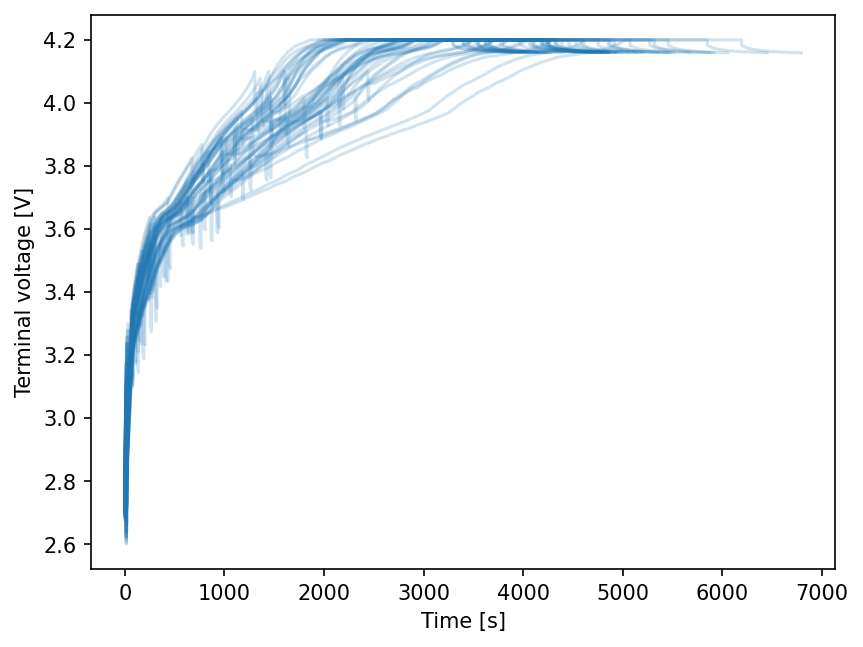

In [ ]:
plt.figure(dpi=150)
for t, v in zip(times,voltages):
  plt.plot(t, v,color='tab:blue', alpha=0.2)
plt.xlabel('Time [s]')
plt.ylabel('Terminal voltage [V]')


# Generate Charge Profile (SOC(t))

In [ ]:
ts = []
socs = []

charge_times = []
SEI_caps = []
Li_plt_caps = []
max_cell_temps = []
avg_cell_temps = []
output_vectors = []

for parameters in param_combos:
    V1 = parameters[0]
    C1 = parameters[1]
    V2 = parameters[2]
    C2 = parameters[3]
    V3 = parameters[4]
    C3 = parameters[5]
    C4 = parameters[6]

    # define charging algorthim
    experiment = pybamm.Experiment([
    (f"Charge at {C1}C until {V1}V",
     f"Rest for 10 seconds",
     f"Charge at {C2}C until {V2}V",
     f"Rest for 10 seconds",
     f"Charge at {C3}C until {V3}V",
     f"Rest for 10 seconds",
     f"Charge at {C4}C until 4.2 V",
     f"Hold at 4.2 V until 0.1C",
     f"Rest for 10 minutes"
    )] * 1)


    var_pts = {
    "x_n": 10,  # negative electrode
    "x_s": 10,  # separator
    "x_p": 10,  # positive electrode
    "r_n": 10,  # negative particle
    "r_p": 10,  # positive particle
    }

    solver = pybamm.CasadiSolver(mode="safe")

    sim = pybamm.Simulation(spm_model,parameter_values=parameter_values,experiment=experiment,var_pts=var_pts)

    print("evaluating function for p = ", parameters)
    simulation = sim.solve(initial_soc = 0)

    charge_time = simulation["Time [s]"].entries[-1]
    SEI_cap = simulation["Loss of capacity to SEI [A.h]"].entries[-1] #capacity lost to SEI growth
    Li_plt = simulation["Loss of capacity to lithium plating [A.h]"].entries[-1] #capacity lost to lithium plating
    cell_temp = simulation["X-averaged cell temperature [C]"].entries #maximum temperature during charge
    max_cell_temp = np.max(cell_temp)
    avg_cell_temp = np.mean(cell_temp)

    output = np.array([charge_time, SEI_cap, Li_plt, max_cell_temp, avg_cell_temp])
    output_vectors.append(output)

    time = simulation["Time [s]"].entries
    current = simulation["Current [A]"].entries
    capacity = integrate.cumulative_trapezoid(current, x=time)/3600
    soc = (capacity/capacity[-1])*100

    ts.append(time)
    socs.append(soc)

Text(0, 0.5, 'SOC [%]')

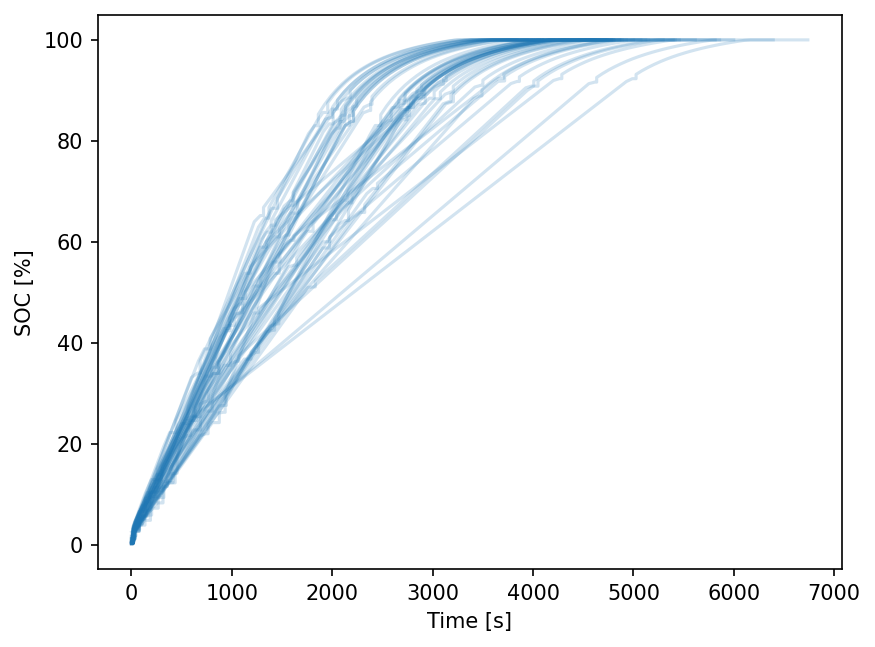

In [ ]:
plt.figure(dpi=150)
for t, soc in zip(ts,socs):
  plt.plot(t[:-1], soc,color='tab:blue', alpha=0.2)
plt.xlabel('Time [s]')
plt.ylabel('SOC [%]')

In [ ]:
df_output_vectors = pd.DataFrame(output_vectors,
                              columns=['Charge Time (s)', 'SEI Cap (Ah)', 'Li Plating Cap (Ah)',
                                       'Max Temp (degC)', 'Avg Temp (degC)'])
df_output_vectors

,Charge Time (s),SEI Cap (Ah),Li Plating Cap (Ah),Max Temp (degC),Avg Temp (degC)
0,4867.925523,0.001507,0.094927,38.278267,31.348922
1,4844.774760,0.001490,0.093930,35.099392,31.416729
2,4923.204420,0.001485,0.093483,34.623982,31.106626
3,4237.669789,0.001447,0.087665,38.097569,32.771015
4,6797.211870,0.001619,0.105911,34.722343,28.782380
5,5476.188644,0.001565,0.099623,35.947373,30.522051
6,5874.066481,0.001558,0.101391,32.902711,29.527438
7,4715.929785,0.001482,0.092719,36.169860,31.577080
8,4793.690985,0.001507,0.094033,39.573731,31.555785
9,5675.919822,0.001560,0.100646,33.938102,30.052038


In [ ]:
output_vectors

[array([4.86792552e+03, 1.50679801e-03, 9.49266712e-02, 3.82782669e+01,
        3.13489224e+01]),
 array([4.84477476e+03, 1.48957894e-03, 9.39302578e-02, 3.50993922e+01,
        3.14167294e+01]),
 array([4.92320442e+03, 1.48496674e-03, 9.34831428e-02, 3.46239823e+01,
        3.11066259e+01]),
 array([4.23766979e+03, 1.44653208e-03, 8.76646184e-02, 3.80975690e+01,
        3.27710155e+01]),
 array([6.79721187e+03, 1.61935982e-03, 1.05911489e-01, 3.47223430e+01,
        2.87823796e+01]),
 array([5.47618864e+03, 1.56456233e-03, 9.96227801e-02, 3.59473727e+01,
        3.05220513e+01]),
 array([5.87406648e+03, 1.55831767e-03, 1.01391112e-01, 3.29027115e+01,
        2.95274376e+01]),
 array([4.71592979e+03, 1.48229459e-03, 9.27188521e-02, 3.61698596e+01,
        3.15770802e+01]),
 array([4.79369099e+03, 1.50705938e-03, 9.40328497e-02, 3.95737308e+01,
        3.15557849e+01]),
 array([5.67591982e+03, 1.56041516e-03, 1.00645669e-01, 3.39381021e+01,
        3.00520383e+01]),
 array([4.15870114e+